In [27]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
os.listdir('../dataset/')

['cifar', 'MNIST', 'mnist_png']

In [10]:
os.listdir('../dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
os.listdir('../dataset/mnist_png/training/0/')[0]

'1.png'

In [32]:
data_paths = glob('../dataset/mnist_png/training/*/*.png')
data_paths[0]

'../dataset/mnist_png/mnist_png/training\\0\\1.png'

In [33]:
path = data_paths[0]
path

'../dataset/mnist_png/mnist_png/training\\0\\1.png'

# 데이터 분석 

In [34]:
len(data_paths)

60000

In [38]:
os.listdir('../dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [37]:
label_nums = os.listdir('../dataset/mnist_png/training')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [52]:
len(os.listdir('../dataset/mnist_png/training/' + '0'))

5923

### 데이터 별 갯수 비교

In [46]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('../dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [48]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [53]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

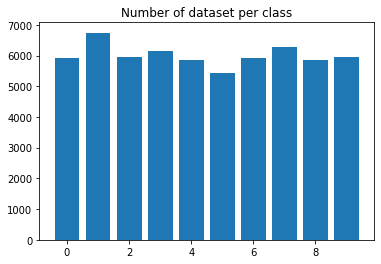

In [54]:
plt.bar(list(range(10)), nums_dataset)
plt.title('Number of dataset per class')
plt.show()

# Pillow로 열기

In [28]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [29]:
image.shape

(28, 28)

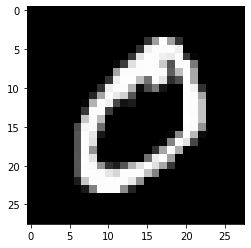

In [31]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [19]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [23]:
image.shape

TensorShape([28, 28, 1])

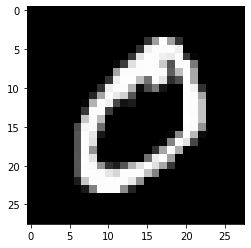

In [25]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [71]:
path

'../dataset/mnist_png/mnist_png/training\\9\\9998.png'

In [72]:
path.split('\\')

['../dataset/mnist_png/mnist_png/training', '9', '9998.png']

In [75]:
cls_n = path.split('\\')[-2]
cls_n

'9'

In [76]:
int(cls_n)

9

In [77]:
def get_label(path):
    cls_n = path.split('\\')[-2]
    return int(cls_n)

In [78]:
lbl = get_label(path)
lbl

9

# 데이터 이미지 사이즈 알기

In [56]:
from tqdm import tqdm_notebook

In [58]:
heights = []
widths = []

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)


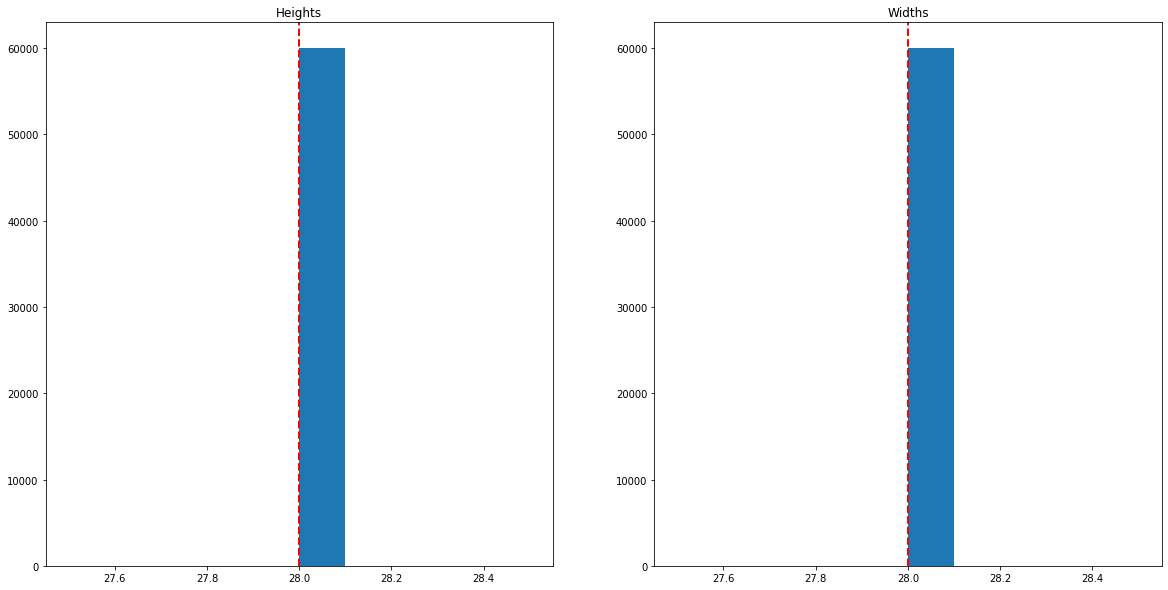

In [70]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()